In [34]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [35]:
ligand_file = "kraken_DFT.xlsx"

In [36]:
ligands = pd.read_excel(ligand_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


In [37]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [38]:
to_remove = ['sphericity_boltz',
             'surface_area_boltz',
             'volume_boltz',
             'pyr_P_boltz',
             'pyr_P_min',
             'pyr_P_max',
             'pyr_P_delta',
             'pyr_P_vburminconf',
             'pyr_alpha_boltz',
            'pyr_alpha_min',
            'pyr_alpha_max',
            'pyr_alpha_delta',
            'pyr_alpha_vburminconf',
            'sterimol_B1_boltz',
            'sterimol_B1_min',
            'sterimol_B1_max',
            'sterimol_B1_delta',
            'sterimol_B1_vburminconf',
            'sterimol_B5_boltz',
            'sterimol_B5_min',
            'sterimol_B5_max',
            'sterimol_B5_delta',
            'sterimol_B5_vburminconf',
            'sterimol_L_boltz',
            'sterimol_L_min',
            'sterimol_L_max',
            'sterimol_L_delta',
            'sterimol_L_vburminconf',
            'sterimol_burB1_boltz',
            'sterimol_burB1_min',
            'sterimol_burB1_max',
            'sterimol_burB1_delta',
            'sterimol_burB1_vburminconf',
            'sterimol_burB5_boltz',
            'sterimol_burB5_min',
            'sterimol_burB5_max',
            'sterimol_burB5_delta',
            'sterimol_burB5_vburminconf',
            'sterimol_burL_boltz',
            'sterimol_burL_min',
            'sterimol_burL_max',
            'sterimol_burL_delta',
            'sterimol_burL_vburminconf',
            'vbur_vtot_boltz',
            'vbur_ratio_vbur_vtot_boltz',
            'vbur_vbur_boltz',
            'vbur_vbur_min',
            'vbur_vbur_max',
            'vbur_vbur_delta',
            'vbur_vbur_vburminconf',
            'vbur_qvbur_min_boltz',
            'vbur_qvbur_min_min',
            'vbur_qvbur_min_max',
            'vbur_qvbur_min_delta',
            'vbur_qvbur_min_vburminconf',
            'vbur_qvbur_max_boltz',
            'vbur_qvbur_max_min',
            'vbur_qvbur_max_max',
            'vbur_qvbur_max_delta',
            'vbur_qvbur_max_vburminconf',
            'vbur_qvtot_min_boltz',
            'vbur_qvtot_min_min',
            'vbur_qvtot_min_max',
            'vbur_qvtot_min_delta',
            'vbur_qvtot_min_vburminconf',
            'vbur_qvtot_max_boltz',
            'vbur_qvtot_max_min',
            'vbur_qvtot_max_max',
            'vbur_qvtot_max_delta',
            'vbur_qvtot_max_vburminconf',
            'vbur_max_delta_qvbur_boltz',
            'vbur_max_delta_qvbur_min',
            'vbur_max_delta_qvbur_max',
            'vbur_max_delta_qvbur_delta',
            'vbur_max_delta_qvbur_vburminconf',
            'vbur_max_delta_qvtot_boltz',
            'vbur_max_delta_qvtot_min',
            'vbur_max_delta_qvtot_max',
             'vbur_max_delta_qvtot_delta',
             'vbur_max_delta_qvtot_vburminconf',
             'vbur_ovbur_min_boltz',
             'vbur_ovbur_min_min',
             'vbur_ovbur_min_max',
             'vbur_ovbur_min_delta',
             'vbur_ovbur_min_vburminconf',
             'vbur_ovbur_max_boltz',
             'vbur_ovbur_max_min',
             'vbur_ovbur_max_max',
             'vbur_ovbur_max_delta',
             'vbur_ovbur_max_vburminconf',
             'vbur_ovtot_min_boltz',
             'vbur_ovtot_min_min',
             'vbur_ovtot_min_max',
             'vbur_ovtot_min_delta',
             'vbur_ovtot_min_vburminconf',
             'vbur_ovtot_max_boltz',
             'vbur_ovtot_max_min',
             'vbur_ovtot_max_max',
             'vbur_ovtot_max_delta',
             'vbur_ovtot_max_vburminconf',
             'vbur_near_vbur_boltz',
             'vbur_near_vbur_min',
             'vbur_near_vbur_max',
             'vbur_near_vbur_delta',
             'vbur_near_vbur_vburminconf',
             'vbur_far_vbur_boltz',
             'vbur_far_vbur_min',
             'vbur_far_vbur_max',
             'vbur_far_vbur_delta',
             'vbur_far_vbur_vburminconf',
             'vbur_near_vtot_boltz',
             'vbur_near_vtot_min',
             'vbur_near_vtot_max',
             'vbur_near_vtot_delta',
             'vbur_near_vtot_vburminconf',
             'vbur_far_vtot_boltz',
             'vbur_far_vtot_min',
             'vbur_far_vtot_max',
             'vbur_far_vtot_delta',
             'vbur_far_vtot_vburminconf']

ligands = ligands.loc[:, ligands.columns!='smiles']
ligands = ligands.loc[:, ligands.columns!='ID']

for i in to_remove:
    ligands = ligands.loc[:, ligands.columns!=i]

ligands.head()

,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,nbo_P_boltz,...,qpoletens_yy_boltz,qpoletens_yy_min,qpoletens_yy_max,qpoletens_yy_delta,qpoletens_yy_vburminconf,qpoletens_zz_boltz,qpoletens_zz_min,qpoletens_zz_max,qpoletens_zz_delta,qpoletens_zz_vburminconf
0,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,-0.363712,0.801914,...,-0.794079,-1.424726,0.709004,2.133731,-0.033839,-2.676198,-4.913980,-1.603841,3.310139,-4.172737
1,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,-0.345264,0.816302,...,0.049290,-0.382885,1.985784,2.368669,0.989549,-3.390953,-5.998325,-1.771031,4.227294,-5.998325
2,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,-0.356952,0.796412,...,1.636633,-2.394301,2.200549,4.594850,-0.335516,-6.932840,-7.489743,-3.530137,3.959606,-4.697545
3,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,-0.349017,0.798225,...,0.793010,-2.515082,1.800251,4.315333,-0.876398,-6.237584,-7.206550,-2.755492,4.451057,-4.879179
4,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,-0.376125,0.787516,...,1.511742,-0.337371,1.983196,2.320567,0.630152,-4.444429,-5.539119,-3.987099,1.552021,-3.987099


In [39]:
ligands = clean_dataset(ligands)

In [40]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [41]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=8,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [42]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [43]:
pipe.fit(ligands)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_init=50,
                                         random_state=42))]))])

/Users/tht13/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


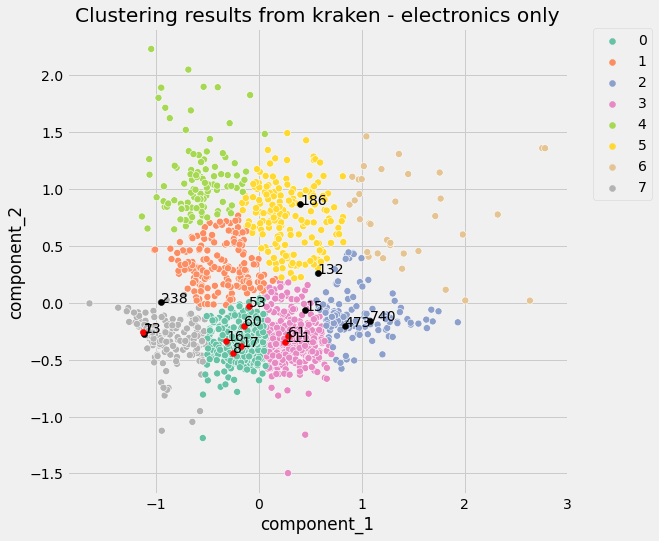

In [44]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(ligands),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Clustering results from kraken - electronics only"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

positive = [132,238,7,15,473,740,186]
negative = [13,111,60,8,61,17,53,16]

for i in positive:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Black')
    plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))
for i in negative:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Red')
    plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))

plt.show()

In [33]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ligands)
    distortions.append(kmeanModel.inertia_)

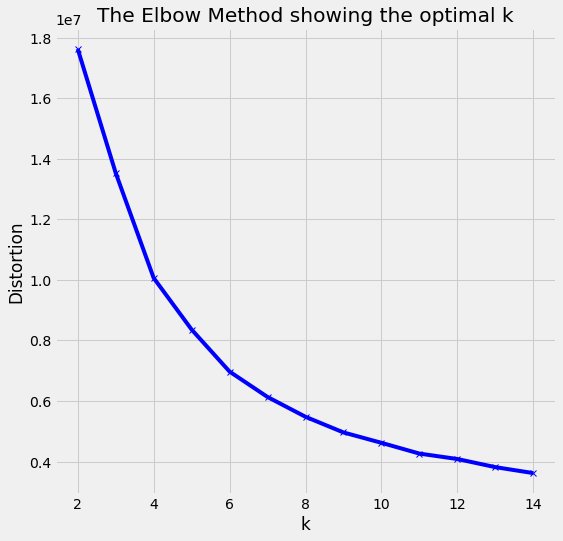

In [24]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()